In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df.drop(['selected_text'], axis = 1, inplace = True)

In [6]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


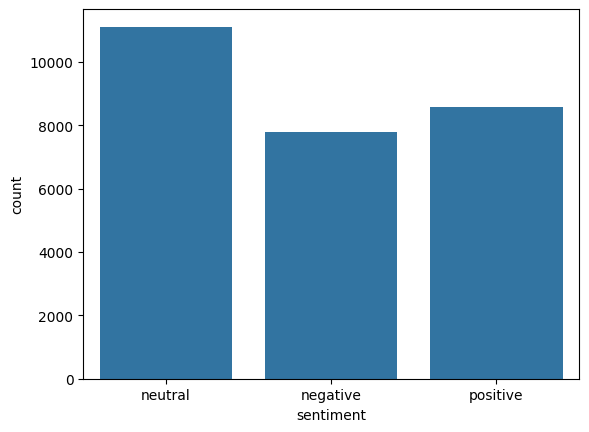

In [7]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [8]:
df.shape

(27481, 3)

In [9]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [10]:
len(df['text'].iloc[0])

36

In [11]:
df['text'].head()

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [13]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [14]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

nan


In [15]:
isinstance("Hello", float)

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [17]:
df.dropna(inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [19]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [20]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [21]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [22]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [23]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [24]:

positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']
neutral = df[df['sentiment'] == 'neutral']

In [25]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [26]:
wordcloud = WordCloud(width = 500, height = 500)

In [27]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [28]:
positive.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [29]:

positive_text = []
for i in range(len(positive)):
    positive_text.append(positive['text'].iloc[i])

In [30]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

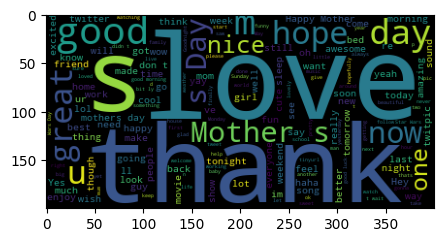

In [31]:
wordcloud = WordCloud(stopwords = STOPWORDS)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (5, 5))
plt.imshow(wordcloud)
plt.show()

In [32]:
negative_text = []
for i in range(len(negative)):
    negative_text.append(negative['text'].iloc[i])

In [33]:
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

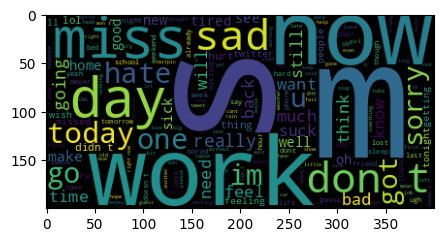

In [34]:
wordcloud = WordCloud(stopwords = STOPWORDS)
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (5, 5))
plt.imshow(wordcloud)
plt.show()

In [35]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [36]:
negative.head()

,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [37]:
positive.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [38]:

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [39]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [40]:
df.drop(['textID'], axis = 1, inplace = True)

In [41]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [42]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

In [43]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [44]:
X_train.shape

(21984, 3)

In [45]:
X_cv.shape

(5496, 3)

In [46]:

import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
from tqdm import tqdm
preprocessed_text = []
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 21984/21984 [00:03<00:00, 6808.17it/s] 


In [48]:
preprocessed_text[0: 5]

['heading airport',
 'say really miss red porsche sold 2 yrs ago',
 'style might work',
 'conserve water take showers together',
 'twitter born 12 feb 09 today point time 4 may 09 3 56pm gmt 8 805 tweets including one']

In [49]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [50]:
X_train.head()

,text,text_length,text_words
8232,heading airport,22,4
9513,say really miss red porsche sold 2 yrs ago,66,15
24401,style might work,41,8
26504,conserve water take showers together,37,5
23931,twitter born 12 feb 09 today point time 4 may ...,129,26


In [51]:
from tqdm import tqdm
preprocessed_text = []
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 5496/5496 [00:00<00:00, 18842.56it/s]


In [52]:
preprocessed_text[0: 5]

['mom happy present yayy',
 'no surprise probably know',
 'nope difference 5 omr c class anyone notice flight number wy flight lhr wy 911',
 'smells badly garlic',
 'friday whole different meaning work saturday sunday']

In [53]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [54]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [55]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [56]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [57]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [58]:
X_train_text.shape

(21984, 22383)

In [59]:
X_train_text[0: 5]

<5x22383 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [60]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [61]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [62]:
y_train

,sentiment
8232,neutral
9513,negative
24401,positive
26504,neutral
23931,neutral
...,...
15650,positive
22638,positive
10124,positive
5601,positive


In [63]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)


In [64]:
y_train_converted

array([1, 0, 2, ..., 2, 2, 0])

In [65]:
y_train_final = to_categorical(y_train_converted)

In [66]:
X_train.head()

,text,text_length,text_words
8232,heading airport,22,4
9513,say really miss red porsche sold 2 yrs ago,66,15
24401,style might work,41,8
26504,conserve water take showers together,37,5
23931,twitter born 12 feb 09 today point time 4 may ...,129,26


In [67]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [68]:
X_train.head()

,text,text_length,text_words
8232,heading airport,22,4
9513,say really miss red porsche sold 2 yrs ago,66,15
24401,style might work,41,8
26504,conserve water take showers together,37,5
23931,twitter born 12 feb 09 today point time 4 may ...,129,26


In [69]:
X_train['text'].head()

,text
8232,heading airport
9513,say really miss red porsche sold 2 yrs ago
24401,style might work
26504,conserve water take showers together
23931,twitter born 12 feb 09 today point time 4 may ...


In [70]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [71]:
X_train_dropped.head()

,text_length,text_words
8232,22,4
9513,66,15
24401,41,8
26504,37,5
23931,129,26


In [72]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [73]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [74]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [75]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [76]:
X_train_final[0: 5]

array([[0.13768116, 0.09677419],
       [0.45652174, 0.4516129 ],
       [0.27536232, 0.22580645],
       [0.24637681, 0.12903226],
       [0.91304348, 0.80645161]])

In [77]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [78]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [79]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [80]:
y_train_final[0: 5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [81]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [82]:
X_train_final[0: 5]

array([[0.13768116, 0.09677419],
       [0.45652174, 0.4516129 ],
       [0.27536232, 0.22580645],
       [0.24637681, 0.12903226],
       [0.91304348, 0.80645161]])

In [83]:
X_train.head()

,text,text_length,text_words
8232,heading airport,22,4
9513,say really miss red porsche sold 2 yrs ago,66,15
24401,style might work,41,8
26504,conserve water take showers together,37,5
23931,twitter born 12 feb 09 today point time 4 may ...,129,26


In [84]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [85]:
X_train_vectorized

<21984x22383 sparse matrix of type '<class 'numpy.int64'>'
	with 155331 stored elements in Compressed Sparse Row format>

In [86]:
X_train_final[0: 5]

array([[0.13768116, 0.09677419],
       [0.45652174, 0.4516129 ],
       [0.27536232, 0.22580645],
       [0.24637681, 0.12903226],
       [0.91304348, 0.80645161]])

In [87]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [88]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

In [89]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')



In [90]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.4849 - loss: 1.0039 - val_accuracy: 0.6923 - val_loss: 0.7548
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.7097 - loss: 0.7055 - val_accuracy: 0.6958 - val_loss: 0.7221
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.8076 - loss: 0.5184 - val_accuracy: 0.6921 - val_loss: 0.7562
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8695 - loss: 0.3765 - val_accuracy: 0.6785 - val_loss: 0.8579
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9067 - loss: 0.2856 - val_accuracy: 0.6698 - val_loss: 0.9881
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.9300 - loss: 0.2229 - val_accuracy: 0.6756 - val_loss: 1.0923
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9420 - loss: 0.1841 - val_accuracy: 0.6727 - val_loss: 1.2723
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9541 - loss: 0.1466 - 

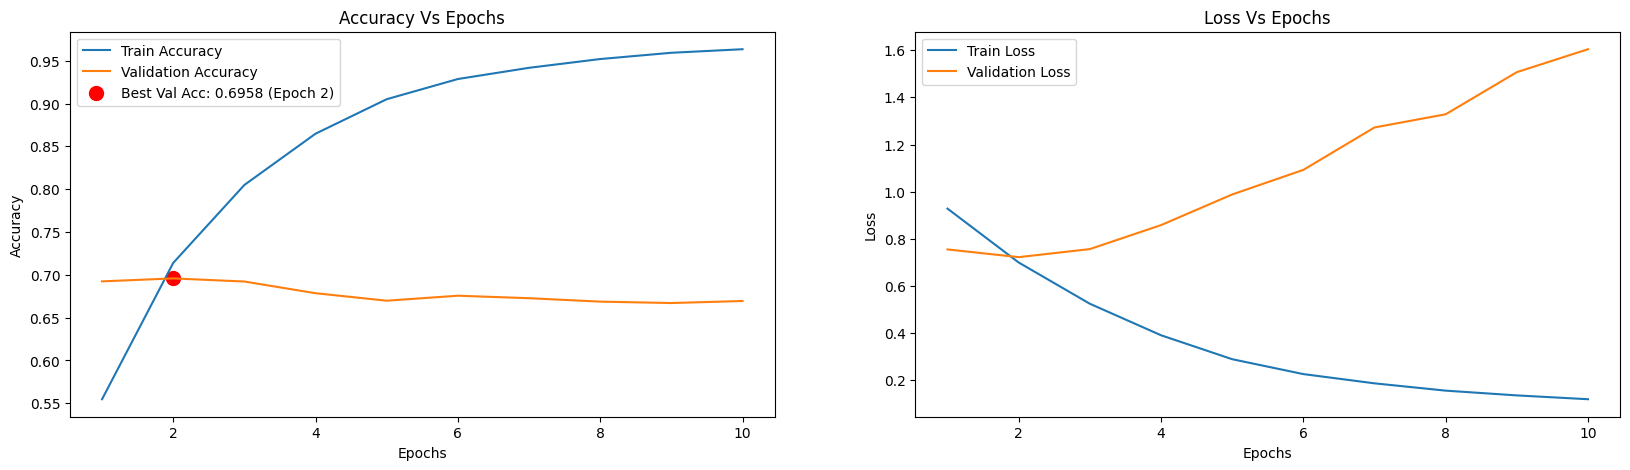

In [93]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)

# Finding the epoch with the best validation accuracy
best_epoch = np.argmax(val_accuracy) + 1
best_val_accuracy = val_accuracy[best_epoch - 1]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plotting accuracy
sns.lineplot(x=epochs, y=accuracy, ax=ax[0], label='Train Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, ax=ax[0], label='Validation Accuracy')
ax[0].scatter(best_epoch, best_val_accuracy, color='red', s=100, label=f'Best Val Acc: {best_val_accuracy:.4f} (Epoch {best_epoch})')
ax[0].set_title('Accuracy Vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plotting loss
sns.lineplot(x=epochs, y=loss, ax=ax[1], label='Train Loss')
sns.lineplot(x=epochs, y=val_loss, ax=ax[1], label='Validation Loss')
ax[1].set_title('Loss Vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()
